# Técnicas de Regresión

En el siguiente script encontrara una serie de ejemplos para trabajar técnicas de regresión con *Machine Learning*


In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

## Ejercicio 0

Genere una función para calcular el Mean Square Error

In [0]:
from sklearn.metrics import mean_squared_error 

# Valores dados
y = [1,2,3,5,7] # y = y (valores originales) 

# Valores calculados
y_bar = [0.1,1.15,2.21,3.69,4.3] # y_bar = y' 

# Cálculo del MSE
mean_squared_error(y,y_bar) 


2.23254

In [0]:
# Sea y e y_bar lo siguiente:
y=[1,2,3,5,7]
y_bar=[0.1,1.15,2.21,3.69,4.3]
#Y el tamaño de y
N = len(y)
suma=0
#Definamos una función de la forma
for i in range (0,N):
  diferencia=y[i] - y_bar[i]
  diferencia_cuadrados=diferencia**2
  suma=suma+diferencia_cuadrados
MSE = suma/N

print('El MSE es:' , MSE)

El MSE es: 2.23254


**Cargue de información**

En esta ocasión se utilizara los conjuntos de datos que maneja el modulo *scikit-learn*

In [0]:
boston = datasets.load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

La información de este dataset

In [0]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Características del dataset

In [0]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Selección de información



In [0]:
#X = boston.data[:,5:8]
X = boston.data[:, np.newaxis, 5]
y = boston.target

Separar la información en datos de entrenamiento y de testeo

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Árbol de decisión

Como lo vimos en la presentación, un árbol de decisión es una técnica de regresión que me permite segmentar la población independiente de su distribución

In [0]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test)

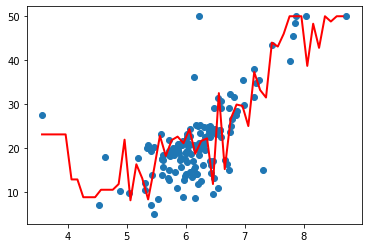

In [0]:
X_grid = np.arange(min(X_test),max(X_test),0.1 )
X_grid = X_grid.reshape((len(X_grid),1))

plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_grid, dtr.predict(X_grid), color = 'red', linewidth = 2 )
plt.show()

In [0]:
dtr.score(X_train, y_train)

0.9580828829140807

In [0]:
mean_squared_error(y_test,y_pred_dtr)

58.73817434210526

### Ejercicio 1

Utilice al menos 4 variables y corra el modelo anterior

In [0]:
# Escriba aquí su respuesta

## Random Forest

Esta técnica permite utilizar varios árboles al tiempo

In [0]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

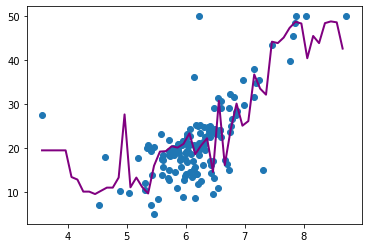

In [0]:
X_grid = np.arange(min(X_test),max(X_test),0.1 )
X_grid = X_grid.reshape((len(X_grid),1))

plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_grid, rfr.predict(X_grid), color = 'purple', linewidth = 2 )
plt.show()

In [0]:
rfr.score(X_train, y_train)

0.8900555617853678

### Ejercicio 2

Utilice las mismas 4 variables, corra el modelo anterior y compare

In [0]:
# Escriba aquí su respuesta

## Gradient Boosting

Utiliza un análisis secuencial para la construcción de un árbol de decisión


In [0]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

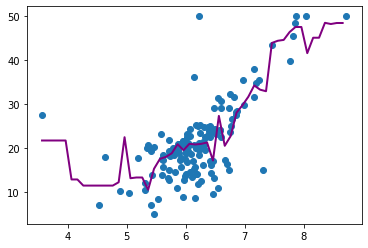

In [0]:
X_grid = np.arange(min(X_test),max(X_test),0.1 )
X_grid = X_grid.reshape((len(X_grid),1))

plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_grid, gbr.predict(X_grid), color = 'purple', linewidth = 2 )
plt.show()

In [0]:
gbr.score(X_train, y_train)

0.7938156429521235

## Ejercicio 3

Utilice las mismas 4 variables, corra el modelo anterior y compare

In [0]:
# Escriba aquí sus respuestas